# Titanic - Machine Learning from Disaster


In [1]:
# Import Libraries 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# Import dataset 
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Check missing values
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
# Check data dtypes 
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## Data Cleaning
### Method
1. Features cabin is dropped due to too many missing values
2. Missing values from feature age are filled with mean values
3. Feature name, fare and ticket is dropped due to irrelevance
4. drop rows with missing embarked values

In [8]:
# Drop cabin
df_train = df_train.drop(["Cabin"], axis=1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
df_test = df_test.drop(["Cabin"], axis=1)
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [10]:
# Fill missing values
df_train["Age"] = df_train["Age"].fillna(value=df_train["Age"].mean())
df_train["Age"].isna().sum()

0

In [11]:
df_test["Age"] = df_test["Age"].fillna(value=df_test["Age"].mean())
df_test["Age"].isna().sum()

0

In [12]:
# Drop name, feature and ticket
df_train = df_train.drop(["PassengerId", "Name", "Ticket"], axis=1)
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [13]:
df_test = df_test.drop(["PassengerId", "Name", "Ticket"], axis=1)
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [14]:
# Drop rows with missing embarked values
df_train = df_train.dropna()

In [15]:
# Check for missing values 
df_train.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
df_test = df_test.dropna(subset=["Embarked"])
df_test.isna().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        1
Embarked    0
dtype: int64

In [17]:
# Splitting data into numeric and categorical data
df_train_cat = df_train[["Pclass", "Sex", "Embarked"]]
df_train_cat.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [18]:
df_test_cat = df_train[["Pclass", "Sex", "Embarked"]]
df_test_cat.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [19]:
df_train_num = df_train.drop(columns=["Pclass", "Sex", "Embarked"], axis=1)
df_train_num.head()


,Survived,Age,SibSp,Parch,Fare
0,0,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,1,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,0,35.0,0,0,8.0500


In [20]:
df_test_num = df_test.drop(columns=["Pclass", "Sex", "Embarked"], axis=1)
df_test_num.head()

,Age,SibSp,Parch,Fare
0,34.5,0,0,7.8292
1,47.0,1,0,7.0000
2,62.0,0,0,9.6875
3,27.0,0,0,8.6625
4,22.0,1,1,12.2875


## Exploratory Data Analysis

### Training Data

In [21]:
# Training Data 
df_train_num.describe()

,Survived,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,29.653446,0.524184,0.382452,32.096681
std,0.486260,12.968366,1.103705,0.806761,49.697504
min,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,80.000000,8.000000,6.000000,512.329200


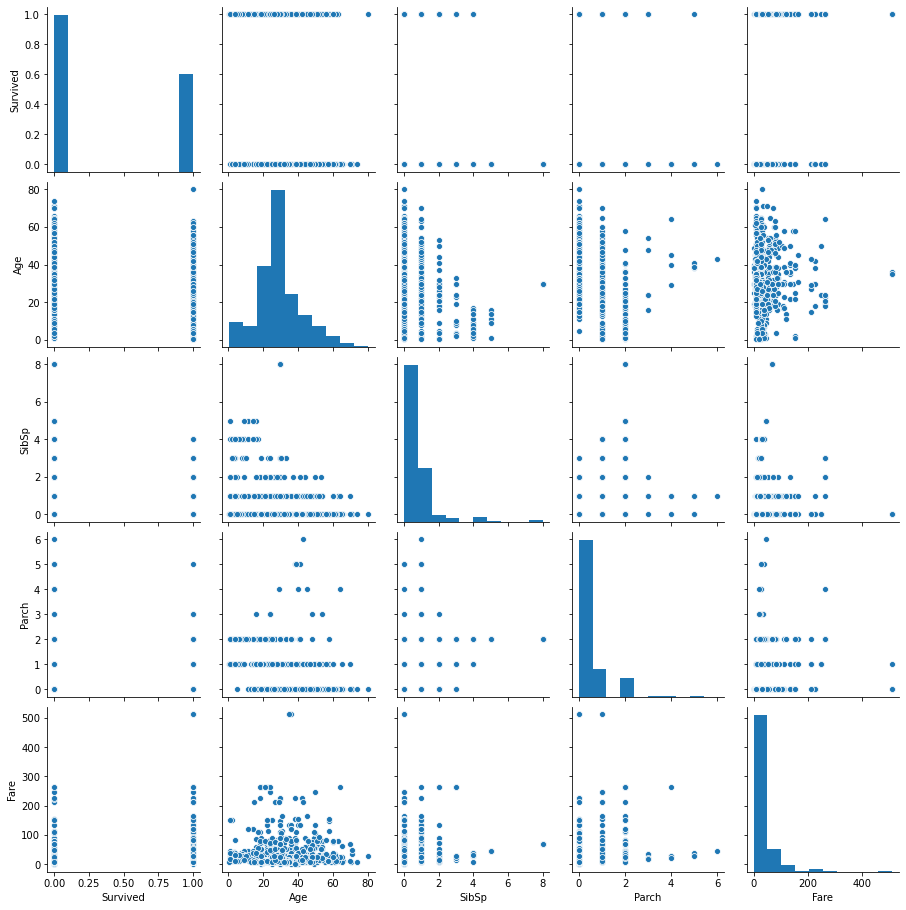

In [22]:
sns.pairplot(df_train_num)

In [23]:
df_train_corr = df_train_num.corr()
df_train_corr

,Survived,Age,SibSp,Parch,Fare
Survived,1.000000,-0.074673,-0.034040,0.083151,0.255290
Age,-0.074673,1.000000,-0.231875,-0.178232,0.088604
SibSp,-0.034040,-0.231875,1.000000,0.414542,0.160887
Parch,0.083151,-0.178232,0.414542,1.000000,0.217532
Fare,0.255290,0.088604,0.160887,0.217532,1.000000


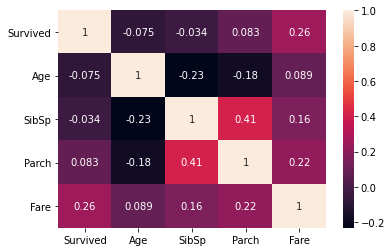

In [24]:
sns.heatmap(df_train_corr, annot=True)

### Survivors

In [25]:
# Count
df_train_num["Survived"].value_counts()

0    549
1    340
Name: Survived, dtype: int64

In [26]:
# Percentage Survived
df_train_num["Survived"].value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

([<matplotlib.patches.Wedge at 0x2c2c50312b0>,
 [Text(-0.3970459950615895, 1.0258433008045393, 'Survived'),
  Text(0.3970459950615891, -1.0258433008045393, 'Deaths')],
 [Text(-0.21657054276086699, 0.5595508913479305, '61.75%'),
  Text(0.21657054276086676, -0.5595508913479305, '38.25%')])

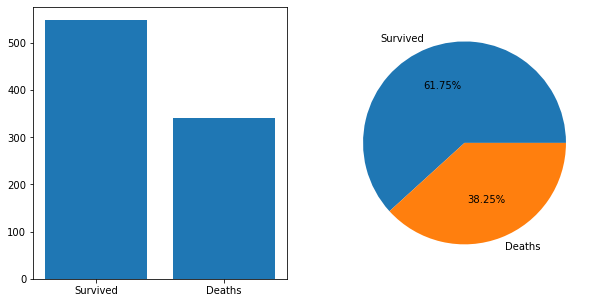

In [27]:
# Vizualization
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(10,5))

axes[0].bar(['Survived', 'Deaths'], df_train_num['Survived'].value_counts())

axes[1].pie(df_train_num['Survived'].value_counts(), labels = ['Survived', 'Deaths'], autopct='%1.2f%%')

### Age

In [28]:
# Count
df_train_raw = pd.read_csv("train.csv")
df_train_raw["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

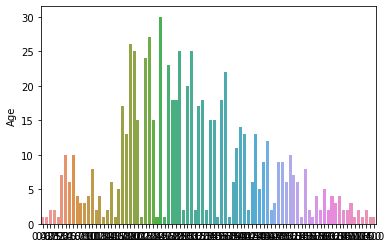

In [29]:
sns.barplot(df_train_raw["Age"].value_counts().index, df_train_raw["Age"].value_counts())

### Sex

In [30]:
# Count
df_train_cat["Sex"].value_counts()

male      577
female    312
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x2c2c638fee0>,
 [Text(-0.49644324689069674, 0.9816028232521659, 'Male'),
  Text(0.4964432468906962, -0.9816028232521663, 'Female')],
 [Text(-0.2707872255767436, 0.5354197217739086, '64.90%'),
  Text(0.27078722557674334, -0.5354197217739088, '35.10%')])

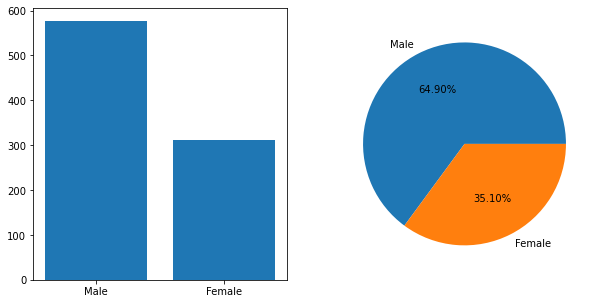

In [31]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(10,5))

axes[0].bar(['Male', 'Female'], df_train_cat['Sex'].value_counts())

axes[1].pie(df_train_cat['Sex'].value_counts(), labels = ['Male', 'Female'], autopct='%1.2f%%')

### Sibsp

In [32]:
# Count
df_train_num["SibSp"].value_counts()

0    606
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

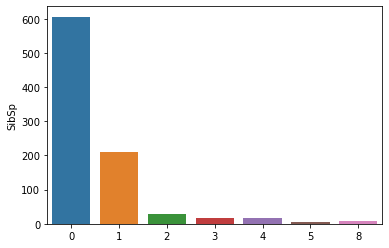

In [33]:
sns.barplot(df_train_num["SibSp"].value_counts().index, df_train_num["SibSp"].value_counts())

### Parch

In [34]:
# Count
df_train_num["Parch"].value_counts() 

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

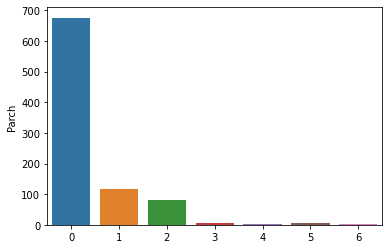

In [35]:
sns.barplot(df_train_num["Parch"].value_counts().index, df_train_num["Parch"].value_counts())

### Pclass

In [36]:
# Count
df_train_cat["Pclass"].value_counts()

3    491
1    214
2    184
Name: Pclass, dtype: int64

([<matplotlib.patches.Wedge at 0x2c2c650c700>,
 [Text(-0.17994396447670752, 1.0851820905490497, '3'),
  Text(-0.5137092106994043, -0.9726781825673871, '2'),
  Text(0.875540033943528, -0.6659051351072208, '1')],
 [Text(-0.09815125335093138, 0.5919175039358452, '55.23%'),
  Text(-0.2802050240178569, -0.5305517359458475, '24.07%'),
  Text(0.4775672912419243, -0.3632209827857568, '20.70%')])

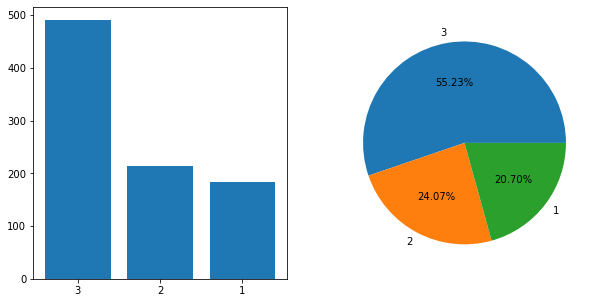

In [37]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(10,5))

axes[0].bar(['3', '2', '1'], df_train_cat['Pclass'].value_counts())

axes[1].pie(df_train_cat['Pclass'].value_counts(), labels = ['3', '2', '1'], autopct='%1.2f%%')

### Embarked

In [38]:
# Count
df_train_cat["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

([<matplotlib.patches.Wedge at 0x2c2c6599bb0>,
 [Text(-0.7128398214280038, 0.8377704870586524, 'S'),
  Text(0.4614522559226597, -0.9985298270476893, 'C'),
  Text(1.0595276168013974, -0.29563698894954155, 'Q')],
 [Text(-0.38882172077891114, 0.4569657202138104, '72.44%'),
  Text(0.25170123050326887, -0.5446526329351032, '18.90%'),
  Text(0.577924154618944, -0.16125653942702264, '8.66%')])

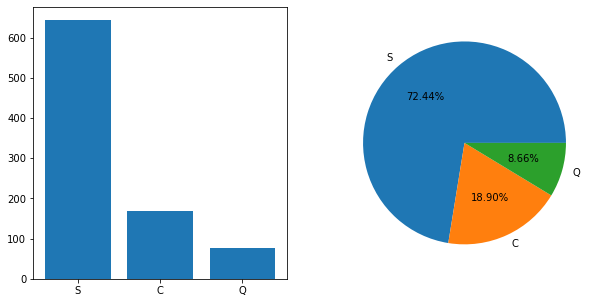

In [39]:
fig, axes = plt.subplots(nrows =1, ncols=2, figsize=(10,5))

axes[0].bar(['S', 'C', 'Q'], df_train_cat['Embarked'].value_counts())

axes[1].pie(df_train_cat['Embarked'].value_counts(), labels = ['S', 'C', 'Q'], autopct='%1.2f%%')

### Correlations

In [40]:
# Survival rates vs sex
pd.pivot_table(df_train, index='Survived', columns = ['Sex'], values = ['Age'], aggfunc='count')

Age     
Sex      female male
Survived            
0            81  468
1           231  109

In [41]:
pd.pivot_table(df_train, index='Survived', columns = ['Embarked'], values = ['Age'], aggfunc='count')

Age         
Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217

## Data Preprocessing

In [42]:
df_train_enc = pd.get_dummies(df_train_cat, columns=['Pclass', 'Sex', 'Embarked'])
df_train_enc.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [43]:
df_test_enc = pd.get_dummies(df_test_cat, columns=['Pclass', 'Sex', 'Embarked'])
df_test_enc.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [46]:
# Merge Dataset 
all_train = pd.concat([df_train_num, df_train_enc], axis=1)
all_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [47]:
X = all_train.drop(columns = ['Survived'], axis=1)
X.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


In [48]:
y = all_train['Survived']
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [49]:
# Merge test set
test = pd.concat([df_test_num, df_train_enc], axis=1)
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


### Feature Scaling

In [58]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc_X = StandardScaler()
#sc_X = MinMaxScaler()
X = sc_X.fit_transform(X)
X.shape

(889, 12)

In [59]:
X

array([[-0.59049493,  0.43135024, -0.47432585, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [ 0.64397101,  0.43135024, -0.47432585, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [-0.28187844, -0.47519908, -0.47432585, ..., -0.48271079,
        -0.30794088,  0.61679395],
       ...,
       [ 0.00352373,  0.43135024,  2.00611934, ..., -0.48271079,
        -0.30794088,  0.61679395],
       [-0.28187844, -0.47519908, -0.47432585, ...,  2.07163382,
        -0.30794088, -1.62128697],
       [ 0.18104628, -0.47519908, -0.47432585, ..., -0.48271079,
         3.24737656, -1.62128697]])

In [60]:
#test = sc_X.fit_transform(test)
#test.shape

In [61]:
test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
1,47.0,1.0,0.0,7.0000,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,62.0,0.0,0.0,9.6875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
3,27.0,0.0,0.0,8.6625,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [62]:
# Splitting training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 4)

## Machine Learning 
Classification
Models
1. Logistical Regression
2. K-Nearest Neighbors
3. Support Vector Machine
4. Kernal SVM
5. Naive Bayes 
6. Desicion Tree Classifier 
7. Random Forest Classifier 

In [74]:
# 1. Logistical regression 
from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_preds = logreg.predict(X_test)

In [75]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logreg,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.752      0.832      0.75       0.78225806 0.85483871]
0.7942193548387098


In [76]:
# Evaluation 
from sklearn.metrics import confusion_matrix, accuracy_score
logreg_results = accuracy_score(y_preds, y_test)
logreg_cm = confusion_matrix(y_test, y_preds)
print(logreg_results)
print(logreg_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [77]:
# 2. K-Neareast Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [78]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(knn,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.776      0.84       0.75806452 0.7983871  0.83064516]
0.8006193548387097


In [79]:
# Evaluation 
knn_results = accuracy_score(y_preds, y_test)
knn_cm = confusion_matrix(y_test, y_preds)
print(knn_results)
print(knn_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


In [80]:
# 3. SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [81]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(svc,X_train,y_train,cv=5)
print(cv)
print(cv.mean())

[0.768      0.832      0.80645161 0.80645161 0.83064516]
0.808709677419355


In [82]:
# Evaluation 
svc_results = accuracy_score(y_preds, y_test)
svc_cm = confusion_matrix(y_test, y_preds)
print(svc_results)
print(svc_cm)

0.7902621722846442
[[142  22]
 [ 34  69]]


### Summary
There are total of 889 passengers in the training data. Out of the 889 passengers, there are 340 survivors and 549 deaths. 